# Introductie SymPy voor Matrixframe opdracht
In deze iPython notebook wordt het gebruik van Python voor het MatrixFrame practicum toegelicht.

## Opdracht 1

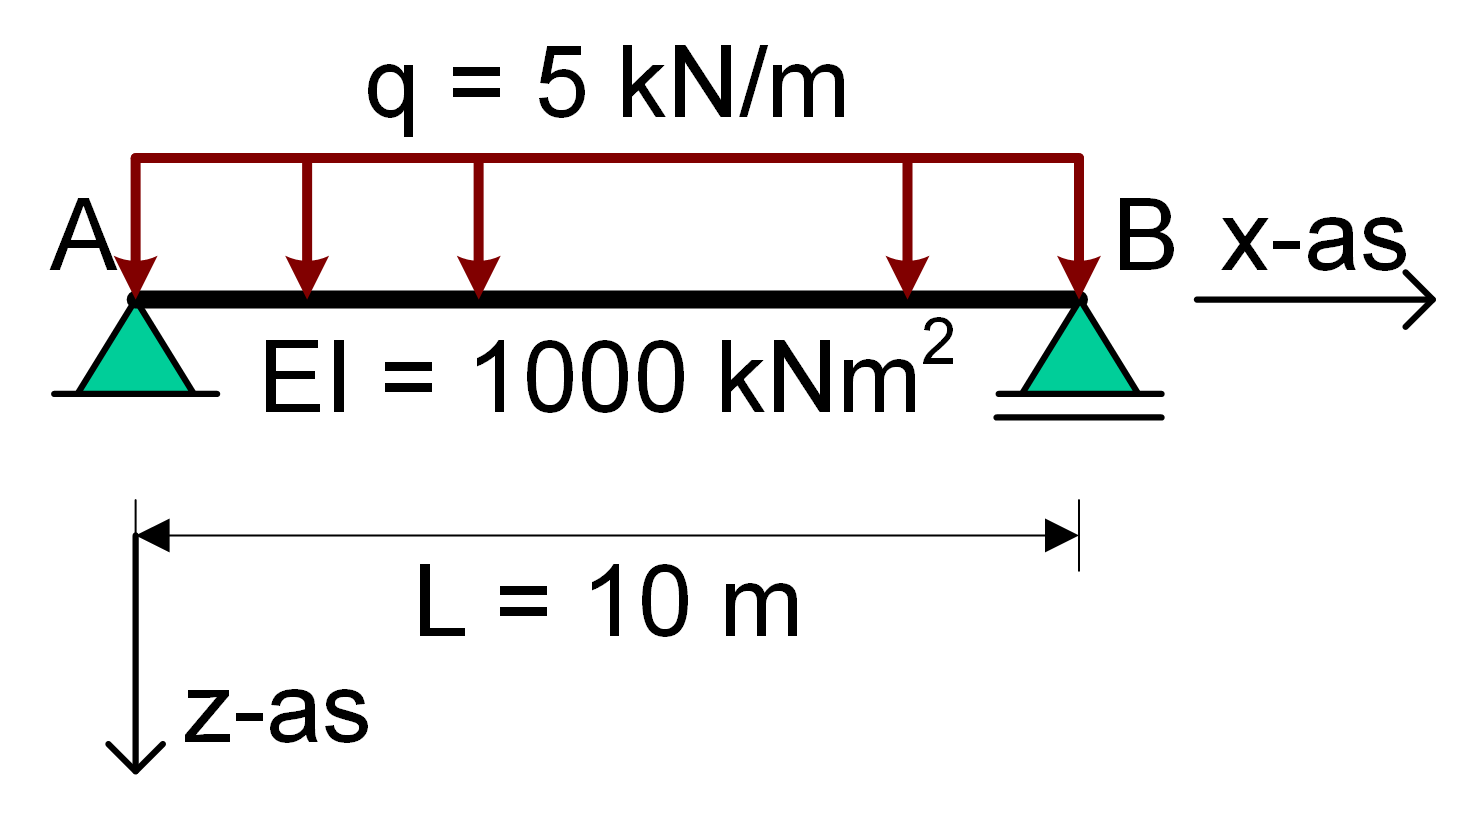

Allereest moeten de bibliotheken worden geïmporteerd. SymPy is de symbolische rekenbibliotheek voor Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

Alle wiskundige symbolen die later rechts van het `=` teken worden geïntroduceerd moeten eerst gedefinieerd worden zodat Python weet dat het om SymPy variabelen gaat. Daarbij moet voor de zakking moet worden aangegeven dat het een functie is.
Daarnaast moeten ook alle mogelijk integratieconstantes moeten worden gedefinieerd.

In [2]:
w = sp.symbols('w', cls=sp.Function)
q, x = sp.symbols('q x')
L, EI = sp.symbols('L EI')
C1, C2, C3, C4 = sp.symbols('C1 C2 C3 C4')

De differentiaalvergelijking voor buiging kan nu worden gedefinieerd. `sp.diff` geeft de afgeleide van de ingevoerde functie (mét `(x)`) tot een zelf te bepalen orde.
Met `display` wordt een variabele op een nette wiskundige manier weergegeven

In [3]:
diffeq = sp.Eq(EI*sp.diff(w(x),x,4),q) 
display(diffeq)

Eq(EI*Derivative(w(x), (x, 4)), q)

De differentiaalvergelijking kan nu worden opgelost
`sp.dsolve` geeft de oplossing van de differentiaalvergelijking met integratieconstantes `C1` t/m `C4`
Met `.rhs` wordt alleen de de rechterzijde van de functie $w(x) = C_1 + C_2x + C_3x^2 + C_4x^3 + {qx^4 \over 24EI}$ genomen

In [4]:
w = sp.dsolve(diffeq, w(x)) 
w = w.rhs 
display(w)

C1 + C2*x + C3*x**2 + C4*x**3 + q*x**4/(24*EI)

De uitdrukkingen voor $\phi$, $\kappa$, $M$ en $V$ kunnen nu worden bepaald

In [5]:
phi = -sp.diff(w, x)
kappa = sp.diff(phi, x)
M = EI * kappa
V = sp.diff(M, x)

Nu kunnen de randvoorwaarden worden ingevuld. Met `.subs` vervang je een variabele in een vergelijking door een andere variabele of een getal. Met `sp.Eq` definieer je een vergelijking met een linker en rechterzijde.

In [6]:
Eq1 = sp.Eq(w.subs(x, 0), 0) 
Eq2 = sp.Eq(w.subs(x, L), 0)
Eq3 = sp.Eq(M.subs(x, 0), 0)
Eq4 = sp.Eq(M.subs(x, L), 0)
display(Eq1,Eq2,Eq3,Eq4)

Eq(C1, 0)

Eq(C1 + C2*L + C3*L**2 + C4*L**3 + L**4*q/(24*EI), 0)

Eq(-2*C3*EI, 0)

Eq(EI*(-2*C3 - 6*C4*L - L**2*q/(2*EI)), 0)

De integratieconstantes kunnen nu worden opgelost. Met `sp.solve` wordt de set vergelijkingen van de randvoorwaarden opgelost voor de onbekende integratieconstantes.

In [7]:
sol = sp.solve((Eq1,Eq2,Eq3,Eq4),(C1,C2,C3,C4))
display(sol)

{C1: 0, C2: L**3*q/(24*EI), C3: 0, C4: -L*q/(12*EI)}

De gevonden integratieconstructies kunnen nu worden ingevoerd in de originele functie voor $w$

In [8]:
w_sol = w.subs(sol)
display(w_sol)

L**3*q*x/(24*EI) - L*q*x**3/(12*EI) + q*x**4/(24*EI)

Voor de numerieke waarde kunnen de symbolen worden vervangen door getalwaardes.

In [9]:
w_subs = w_sol.subs([(EI,1000),(q,5),(L,10)])
display(w_subs)

x**4/4800 - x**3/240 + 5*x/24

Om de gevonden functie te plotten is het handig de SymPy vergelijking om te schrijven naar NumPy functie, `sp.lambdify` doet dat voor je. Vervolgens kan je met bekende functies van NumPy en Matplotlib een grafiek plotten.

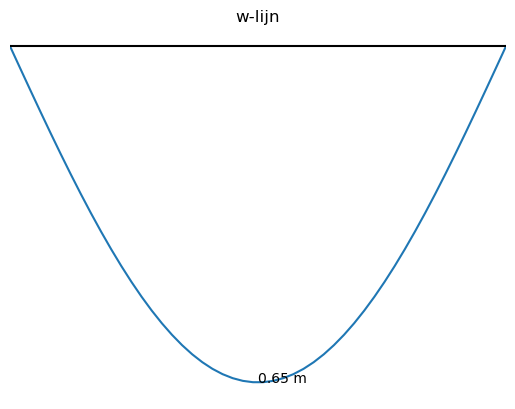

In [10]:
w_numpy = sp.lambdify(x,w_subs) 
x_plot = np.linspace(0,10,50)
w_plot = w_numpy(x_plot)
plt.plot(x_plot,w_plot)
plt.gca().invert_yaxis() # draait de y-as om
plt.title("w-lijn")
plt.axhline(0,color='black') #geeft een horizontale lijn op w=0 weer
plt.xlim(0,10)
plt.annotate('%.2f m' % w_numpy(5), xy = [5,w_numpy(5)]) #geeft de getalswaarde weer in de grafiek
plt.axis('off');

De $\phi$, $M$ en $V$-lijn kunnen op gelijke wijze worden gevonden als de $w-$lijn.

-L**3*q/(24*EI) + L*q*x**2/(4*EI) - q*x**3/(6*EI)

-x**3/1200 + x**2/80 - 5/24

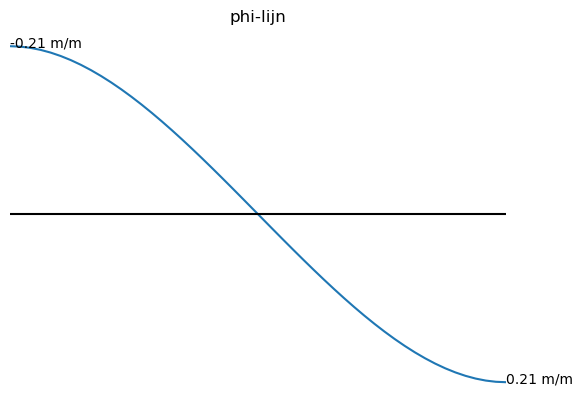

In [11]:
phi_sol = phi.subs(sol)
display(phi_sol)

phi_subs = phi_sol.subs([(EI,1000),(q,5),(L,10)])
display(phi_subs)

phi_numpy = sp.lambdify(x,phi_subs)
phi_plot = phi_numpy(x_plot)
plt.figure()
plt.plot(x_plot,phi_plot)
plt.gca().invert_yaxis()
plt.title("phi-lijn")
plt.axhline(0,color='black')
plt.xlim(0,10)
plt.annotate('%.2f m/m' % phi_numpy(0),xy = [0,phi_numpy(0)])
plt.annotate('%.2f m/m' % phi_numpy(10),xy = [10,phi_numpy(10)])
plt.axis('off');

EI*(L*q*x/(2*EI) - q*x**2/(2*EI))

-5*x**2/2 + 25*x

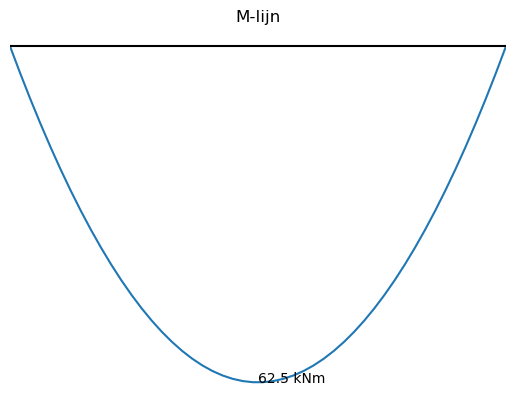

In [12]:
M_sol = M.subs(sol)
display(M_sol)

M_subs = M_sol.subs([(EI,1000),(q,5),(L,10)])
display(M_subs)

M_numpy = sp.lambdify(x,M_subs)
M_plot = M_numpy(x_plot)
plt.figure()
plt.plot(x_plot,M_plot)
plt.gca().invert_yaxis()
plt.title("M-lijn")
plt.axhline(0,color='black')
plt.xlim(0,10)
plt.annotate('%.1f kNm' % M_numpy(5),xy = [5,M_numpy(5)])
plt.axis('off');

EI*(L*q/(2*EI) - q*x/EI)

25 - 5*x

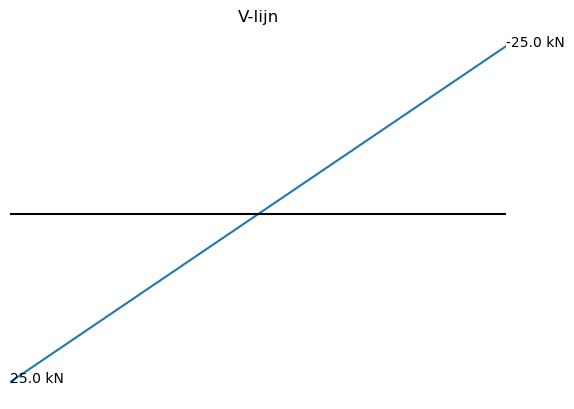

In [13]:
V_sol = V.subs(sol)
display(V_sol)

V_subs = V_sol.subs([(EI,1000),(q,5),(L,10)])
display(V_subs)

V_numpy = sp.lambdify(x,V_subs)
V_plot = V_numpy(x_plot)
plt.figure()
plt.plot(x_plot,V_plot)
plt.gca().invert_yaxis()
plt.title("V-lijn")
plt.axhline(0,color='black')
plt.xlim(0,10)
plt.annotate('%.1f kN' % V_numpy(0),xy = [0,V_numpy(0)])
plt.annotate('%.1f kN' % V_numpy(10),xy = [10,V_numpy(10)])
plt.axis('off');

## Opdracht 2
ALs de ligger bestaat uit meerdere velden bestaat, kan deze met meerdere differentiaalvergelijkgen worden opgelost.
Matrixframe introductie-practicum - Opdracht 2
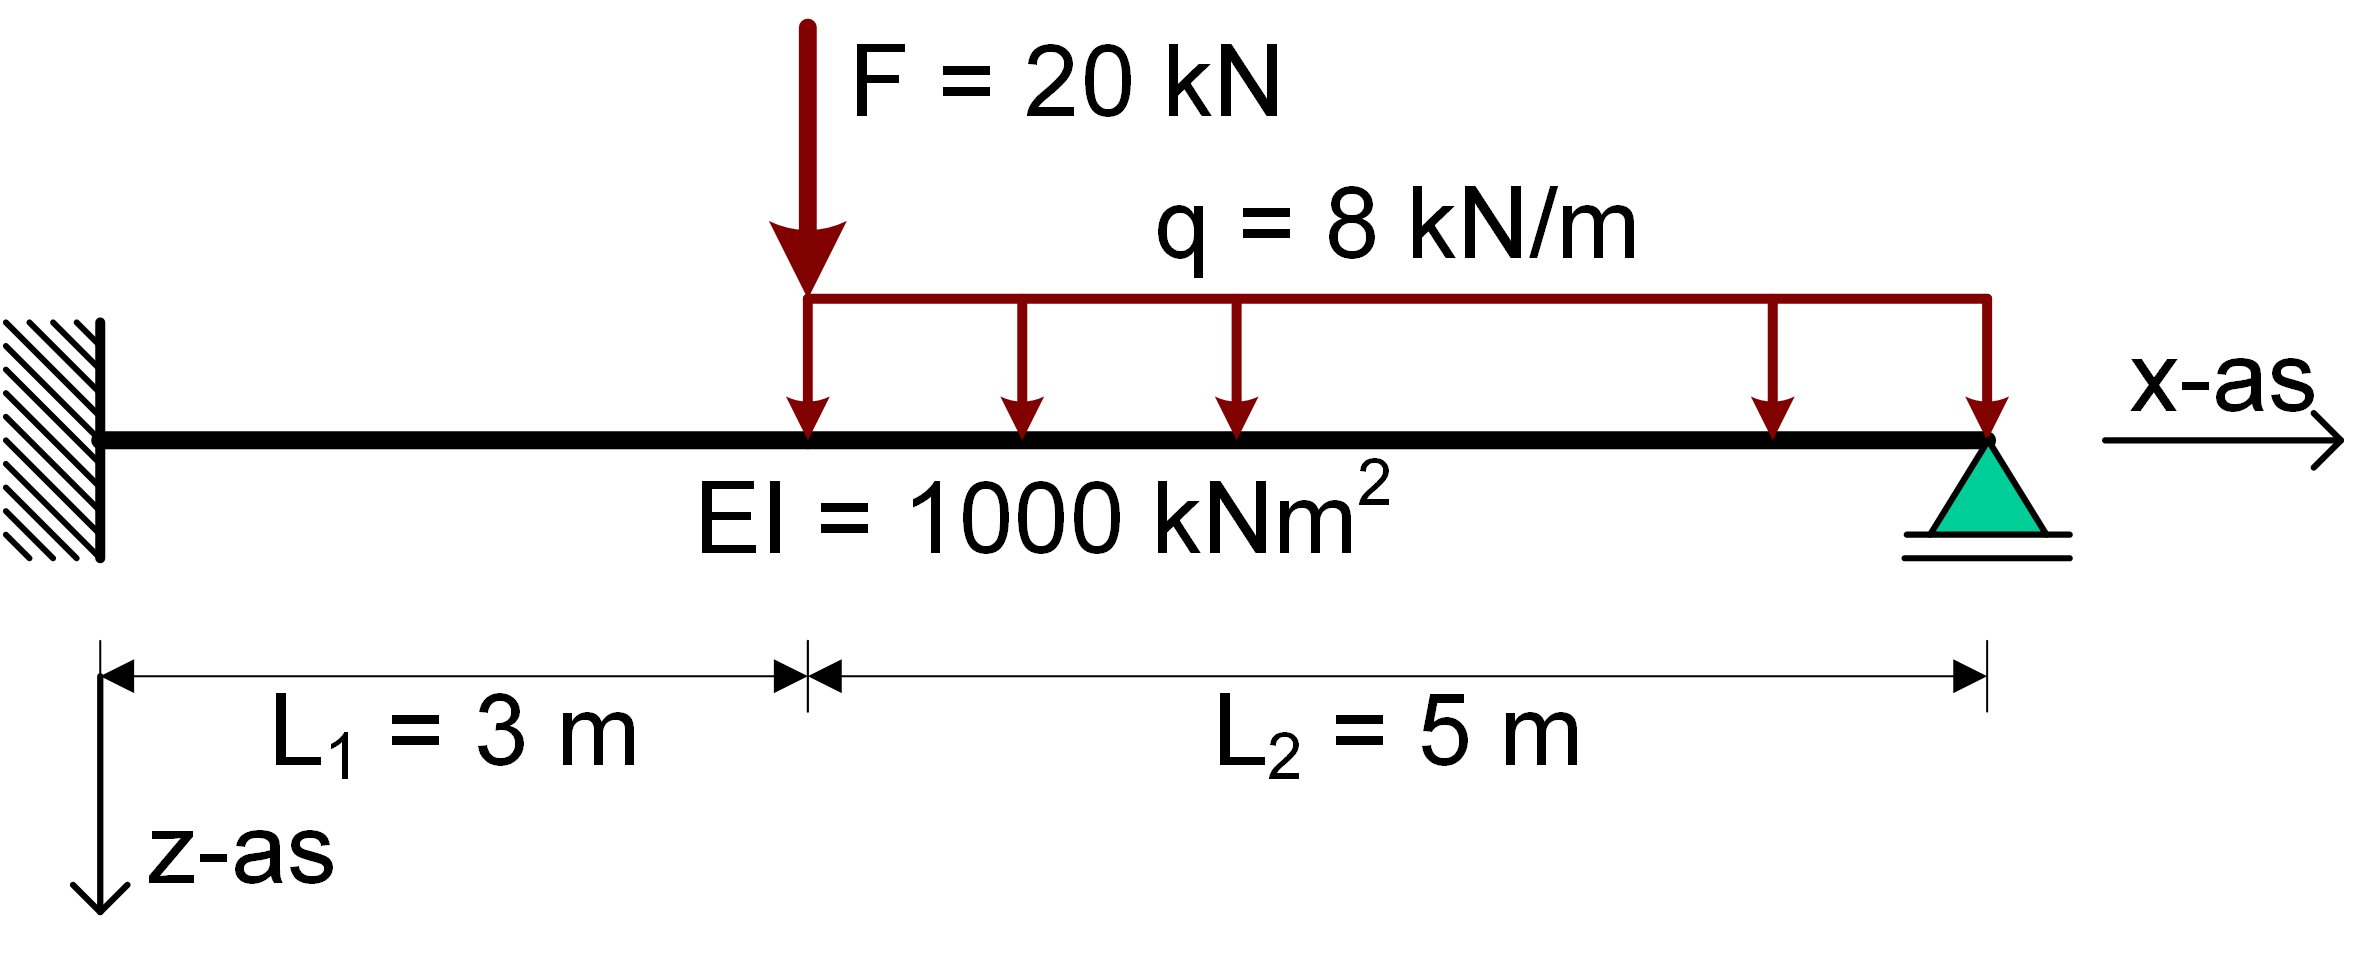
Voor elk veld moeten allereerst apart de symbolen worden gedefiniëerd

In [14]:
w1, w2 = sp.symbols('w1 w2', cls=sp.Function)
q1, q2 = sp.symbols('q1 q2')
F, L1, L2, EI = sp.symbols('F L1 L2 EI')
C1, C2, C3, C4, C5, C6, C7, C8 = sp.symbols('C1 C2 C3 C4 C5 C6 C7 C8')
x = sp.symbols('x')

diffeq1 = sp.Eq(EI*w1(x).diff(x,4),q1)
diffeq2 = sp.Eq(EI*w2(x).diff(x,4),q2)
display(diffeq1,diffeq2)

Eq(EI*Derivative(w1(x), (x, 4)), q1)

Eq(EI*Derivative(w2(x), (x, 4)), q2)

De vergelijkingen moeten gelijktijdig worden opgelost zodat er 8 verschillende integratieconstantes worden opgesteld

In [15]:
w1,w2 = sp.dsolve([diffeq1,diffeq2],[w1(x),w2(x)]) 
w1 = w1.rhs
w2 = w2.rhs

phi1 = -sp.diff(w1,x)
kappa1 = sp.diff(phi1,x)
M1 = EI * kappa1
V1 = sp.diff(M1,x)
phi2 = -sp.diff(w2,x)
kappa2 = sp.diff(phi2,x)
M2 = EI * kappa2
V2 = sp.diff(M2,x)

Eq1 = sp.Eq(w1.subs(x,0),0)
Eq2 = sp.Eq(phi1.subs(x,0),0)
Eq3 = sp.Eq(w1.subs(x,L1),w2.subs(x,L1))
Eq4 = sp.Eq(M1.subs(x,L1),M2.subs(x,L1))
Eq5 = sp.Eq(V1.subs(x,L1),V2.subs(x,L1)+F)
Eq6 = sp.Eq(phi1.subs(x,L1),phi2.subs(x,L1))
Eq7 = sp.Eq(w2.subs(x,L1+L2),0)
Eq8 = sp.Eq(M2.subs(x,L1+L2),0)
display(Eq1,Eq2,Eq3,Eq4,Eq5,Eq6,Eq7,Eq8)

Eq(C1, 0)

Eq(-C2, 0)

Eq(C1 + C2*L1 + C3*L1**2/2 + C4*L1**3/6 + L1**4*q1/(24*EI), C5 + C6*L1 + C7*L1**2/2 + C8*L1**3/6 + L1**4*q2/(24*EI))

Eq(EI*(-C3 - C4*L1 - L1**2*q1/(2*EI)), EI*(-C7 - C8*L1 - L1**2*q2/(2*EI)))

Eq(EI*(-C4 - L1*q1/EI), EI*(-C8 - L1*q2/EI) + F)

Eq(-C2 - C3*L1 - C4*L1**2/2 - L1**3*q1/(6*EI), -C6 - C7*L1 - C8*L1**2/2 - L1**3*q2/(6*EI))

Eq(C5 + C6*(L1 + L2) + C7*(L1 + L2)**2/2 + C8*(L1 + L2)**3/6 + q2*(L1 + L2)**4/(24*EI), 0)

Eq(EI*(-C7 - C8*(L1 + L2) - q2*(L1 + L2)**2/(2*EI)), 0)

In [16]:
sol = sp.solve((Eq1,Eq2,Eq3,Eq4,Eq5,Eq6,Eq7,Eq8),(C1,C2,C3,C4,C5,C6,C7,C8))
display(sol)

{C1: 0,
 C2: 0,
 C3: (4*F*L1**2*L2 + 8*F*L1*L2**2 + L1**4*q1 + 4*L1**3*L2*q1 + 4*L1**2*L2**2*q1 + 2*L1**2*L2**2*q2 + 4*L1*L2**3*q2 + L2**4*q2)/(8*EI*L1**2 + 16*EI*L1*L2 + 8*EI*L2**2),
 C4: (-12*F*L1**2*L2 - 24*F*L1*L2**2 - 8*F*L2**3 - 5*L1**4*q1 - 20*L1**3*L2*q1 - 24*L1**2*L2**2*q1 - 6*L1**2*L2**2*q2 - 8*L1*L2**3*q1 - 12*L1*L2**3*q2 - 5*L2**4*q2)/(8*EI*L1**3 + 24*EI*L1**2*L2 + 24*EI*L1*L2**2 + 8*EI*L2**3),
 C5: (-4*F*L1**3 - L1**4*q1 + L1**4*q2)/(24*EI),
 C6: (3*F*L1**2 + L1**3*q1 - L1**3*q2)/(6*EI),
 C7: (-8*F*L1**3 - 12*F*L1**2*L2 - 3*L1**4*q1 + 4*L1**4*q2 - 4*L1**3*L2*q1 + 8*L1**3*L2*q2 + 6*L1**2*L2**2*q2 + 4*L1*L2**3*q2 + L2**4*q2)/(8*EI*L1**2 + 16*EI*L1*L2 + 8*EI*L2**2),
 C8: (8*F*L1**3 + 12*F*L1**2*L2 + 3*L1**4*q1 - 8*L1**4*q2 + 4*L1**3*L2*q1 - 24*L1**3*L2*q2 - 30*L1**2*L2**2*q2 - 20*L1*L2**3*q2 - 5*L2**4*q2)/(8*EI*L1**3 + 24*EI*L1**2*L2 + 24*EI*L1*L2**2 + 8*EI*L2**3)}

In [17]:
w1_sol = w1.subs(sol)
w2_sol = w2.subs(sol)
display(w1_sol,w2_sol)

x**3*(-12*F*L1**2*L2 - 24*F*L1*L2**2 - 8*F*L2**3 - 5*L1**4*q1 - 20*L1**3*L2*q1 - 24*L1**2*L2**2*q1 - 6*L1**2*L2**2*q2 - 8*L1*L2**3*q1 - 12*L1*L2**3*q2 - 5*L2**4*q2)/(6*(8*EI*L1**3 + 24*EI*L1**2*L2 + 24*EI*L1*L2**2 + 8*EI*L2**3)) + x**2*(4*F*L1**2*L2 + 8*F*L1*L2**2 + L1**4*q1 + 4*L1**3*L2*q1 + 4*L1**2*L2**2*q1 + 2*L1**2*L2**2*q2 + 4*L1*L2**3*q2 + L2**4*q2)/(2*(8*EI*L1**2 + 16*EI*L1*L2 + 8*EI*L2**2)) + q1*x**4/(24*EI)

x**3*(8*F*L1**3 + 12*F*L1**2*L2 + 3*L1**4*q1 - 8*L1**4*q2 + 4*L1**3*L2*q1 - 24*L1**3*L2*q2 - 30*L1**2*L2**2*q2 - 20*L1*L2**3*q2 - 5*L2**4*q2)/(6*(8*EI*L1**3 + 24*EI*L1**2*L2 + 24*EI*L1*L2**2 + 8*EI*L2**3)) + x**2*(-8*F*L1**3 - 12*F*L1**2*L2 - 3*L1**4*q1 + 4*L1**4*q2 - 4*L1**3*L2*q1 + 8*L1**3*L2*q2 + 6*L1**2*L2**2*q2 + 4*L1*L2**3*q2 + L2**4*q2)/(2*(8*EI*L1**2 + 16*EI*L1*L2 + 8*EI*L2**2)) + q2*x**4/(24*EI) + x*(3*F*L1**2 + L1**3*q1 - L1**3*q2)/(6*EI) + (-4*F*L1**3 - L1**4*q1 + L1**4*q2)/(24*EI)

In [18]:
w1_subs = w1_sol.subs([(EI,1000),(F,20),(q1,0),(q2,8),(L1,3),(L2,5)])
w2_subs = w2_sol.subs([(EI,1000),(F,20),(q1,0),(q2,8),(L1,3),(L2,5)])
display(w1_subs,w2_subs)

-231*x**3/40960 + 181*x**2/5120

x**4/3000 - 19373*x**3/3072000 + 2989*x**2/128000 + 27*x/500 - 63/1000

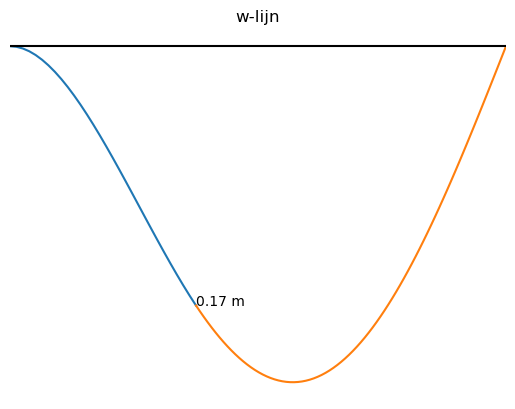

In [19]:
x1_plot = np.linspace(0,3,30)
x2_plot = np.linspace(3,8,80)
w1_numpy = sp.lambdify(x,w1_subs)
w2_numpy = sp.lambdify(x,w2_subs)
w1_plot = w1_numpy(x1_plot)
w2_plot = w2_numpy(x2_plot)
plt.plot(x1_plot,w1_plot)
plt.plot(x2_plot,w2_plot)
plt.gca().invert_yaxis()
plt.title("w-lijn")
plt.axhline(0,color='black')
plt.xlim(0,8)
plt.annotate('%.2f m' % w1_numpy(3),xy = [3,w1_numpy(3)])
plt.axis('off');

-x**2*(-12*F*L1**2*L2 - 24*F*L1*L2**2 - 8*F*L2**3 - 5*L1**4*q1 - 20*L1**3*L2*q1 - 24*L1**2*L2**2*q1 - 6*L1**2*L2**2*q2 - 8*L1*L2**3*q1 - 12*L1*L2**3*q2 - 5*L2**4*q2)/(2*(8*EI*L1**3 + 24*EI*L1**2*L2 + 24*EI*L1*L2**2 + 8*EI*L2**3)) - x*(4*F*L1**2*L2 + 8*F*L1*L2**2 + L1**4*q1 + 4*L1**3*L2*q1 + 4*L1**2*L2**2*q1 + 2*L1**2*L2**2*q2 + 4*L1*L2**3*q2 + L2**4*q2)/(8*EI*L1**2 + 16*EI*L1*L2 + 8*EI*L2**2) - q1*x**3/(6*EI)

-x**2*(8*F*L1**3 + 12*F*L1**2*L2 + 3*L1**4*q1 - 8*L1**4*q2 + 4*L1**3*L2*q1 - 24*L1**3*L2*q2 - 30*L1**2*L2**2*q2 - 20*L1*L2**3*q2 - 5*L2**4*q2)/(2*(8*EI*L1**3 + 24*EI*L1**2*L2 + 24*EI*L1*L2**2 + 8*EI*L2**3)) - x*(-8*F*L1**3 - 12*F*L1**2*L2 - 3*L1**4*q1 + 4*L1**4*q2 - 4*L1**3*L2*q1 + 8*L1**3*L2*q2 + 6*L1**2*L2**2*q2 + 4*L1*L2**3*q2 + L2**4*q2)/(8*EI*L1**2 + 16*EI*L1*L2 + 8*EI*L2**2) - q2*x**3/(6*EI) - (3*F*L1**2 + L1**3*q1 - L1**3*q2)/(6*EI)

693*x**2/40960 - 181*x/2560

-x**3/750 + 19373*x**2/1024000 - 2989*x/64000 - 27/500

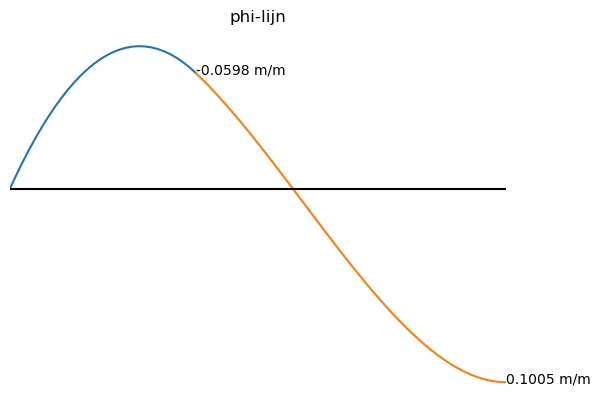

In [20]:
phi1_sol = phi1.subs(sol)
phi2_sol = phi2.subs(sol)
display(phi1_sol, phi2_sol)

phi1_subs = phi1_sol.subs([(EI,1000),(F,20),(q1,0),(q2,8),(L1,3),(L2,5)])
phi2_subs = phi2_sol.subs([(EI,1000),(F,20),(q1,0),(q2,8),(L1,3),(L2,5)])
display(phi1_subs, phi2_subs)

phi1_numpy = sp.lambdify(x,phi1_subs)
phi2_numpy = sp.lambdify(x,phi2_subs)
phi1_plot = phi1_numpy(x1_plot)
phi2_plot = phi2_numpy(x2_plot)
plt.figure()
plt.plot(x1_plot,phi1_plot)
plt.plot(x2_plot,phi2_plot)
plt.gca().invert_yaxis()
plt.title("phi-lijn")
plt.axhline(0,color='black')
plt.xlim(0,8)
plt.annotate('%.4f m/m' % phi1_numpy(3),xy = [3,phi1_numpy(3)])
plt.annotate('%.4f m/m' % phi2_numpy(8),xy = [8,phi2_numpy(8)])
plt.axis('off');

EI*(-x*(-12*F*L1**2*L2 - 24*F*L1*L2**2 - 8*F*L2**3 - 5*L1**4*q1 - 20*L1**3*L2*q1 - 24*L1**2*L2**2*q1 - 6*L1**2*L2**2*q2 - 8*L1*L2**3*q1 - 12*L1*L2**3*q2 - 5*L2**4*q2)/(8*EI*L1**3 + 24*EI*L1**2*L2 + 24*EI*L1*L2**2 + 8*EI*L2**3) - (4*F*L1**2*L2 + 8*F*L1*L2**2 + L1**4*q1 + 4*L1**3*L2*q1 + 4*L1**2*L2**2*q1 + 2*L1**2*L2**2*q2 + 4*L1*L2**3*q2 + L2**4*q2)/(8*EI*L1**2 + 16*EI*L1*L2 + 8*EI*L2**2) - q1*x**2/(2*EI))

EI*(-x*(8*F*L1**3 + 12*F*L1**2*L2 + 3*L1**4*q1 - 8*L1**4*q2 + 4*L1**3*L2*q1 - 24*L1**3*L2*q2 - 30*L1**2*L2**2*q2 - 20*L1*L2**3*q2 - 5*L2**4*q2)/(8*EI*L1**3 + 24*EI*L1**2*L2 + 24*EI*L1*L2**2 + 8*EI*L2**3) - (-8*F*L1**3 - 12*F*L1**2*L2 - 3*L1**4*q1 + 4*L1**4*q2 - 4*L1**3*L2*q1 + 8*L1**3*L2*q2 + 6*L1**2*L2**2*q2 + 4*L1*L2**3*q2 + L2**4*q2)/(8*EI*L1**2 + 16*EI*L1*L2 + 8*EI*L2**2) - q2*x**2/(2*EI))

17325*x/512 - 4525/64

-4*x**2 + 19373*x/512 - 2989/64

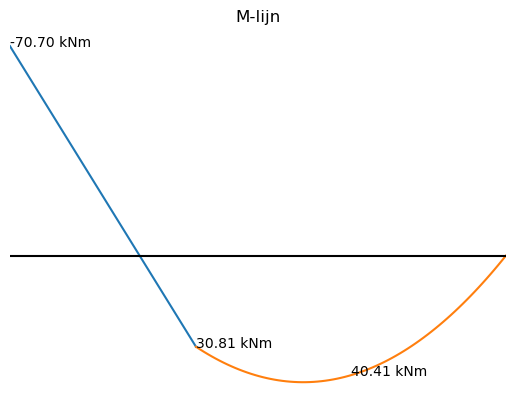

In [21]:
M1_sol = M1.subs(sol)
M2_sol = M2.subs(sol)
display(M1_sol, M2_sol)

M1_subs = M1_sol.subs([(EI,1000),(F,20),(q1,0),(q2,8),(L1,3),(L2,5)])
M2_subs = M2_sol.subs([(EI,1000),(F,20),(q1,0),(q2,8),(L1,3),(L2,5)])
display(M1_subs, M2_subs)

M1_numpy = sp.lambdify(x,M1_subs)
M2_numpy = sp.lambdify(x,M2_subs)
M1_plot = M1_numpy(x1_plot)
M2_plot = M2_numpy(x2_plot)
plt.figure()
plt.plot(x1_plot,M1_plot)
plt.plot(x2_plot,M2_plot)
plt.gca().invert_yaxis()
plt.title("M-lijn")
plt.axhline(0,color='black')
plt.xlim(0,8)
plt.annotate('%.2f kNm' % M1_numpy(0),xy = [0,M1_numpy(0)])
plt.annotate('%.2f kNm' % M1_numpy(3),xy = [3,M1_numpy(3)])
plt.annotate('%.2f kNm' % M2_numpy(5.5),xy = [5.5,M2_numpy(5.5)])
plt.axis('off');

EI*(-(-12*F*L1**2*L2 - 24*F*L1*L2**2 - 8*F*L2**3 - 5*L1**4*q1 - 20*L1**3*L2*q1 - 24*L1**2*L2**2*q1 - 6*L1**2*L2**2*q2 - 8*L1*L2**3*q1 - 12*L1*L2**3*q2 - 5*L2**4*q2)/(8*EI*L1**3 + 24*EI*L1**2*L2 + 24*EI*L1*L2**2 + 8*EI*L2**3) - q1*x/EI)

EI*(-(8*F*L1**3 + 12*F*L1**2*L2 + 3*L1**4*q1 - 8*L1**4*q2 + 4*L1**3*L2*q1 - 24*L1**3*L2*q2 - 30*L1**2*L2**2*q2 - 20*L1*L2**3*q2 - 5*L2**4*q2)/(8*EI*L1**3 + 24*EI*L1**2*L2 + 24*EI*L1*L2**2 + 8*EI*L2**3) - q2*x/EI)

17325/512

19373/512 - 8*x

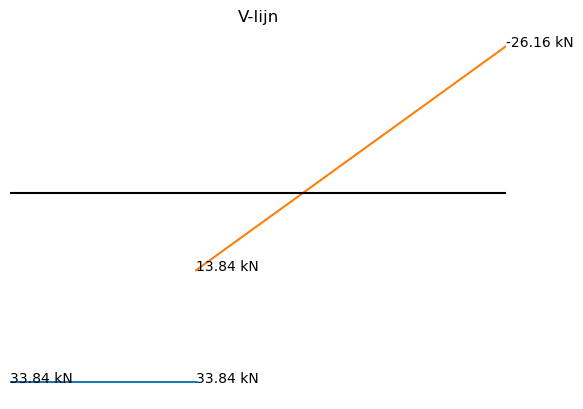

In [22]:
V1_sol = V1.subs(sol)
V2_sol = V2.subs(sol)
display(V1_sol, V2_sol)

V1_subs = V1_sol.subs([(EI,1000),(F,20),(q1,0),(q2,8),(L1,3),(L2,5)])
V2_subs = V2_sol.subs([(EI,1000),(F,20),(q1,0),(q2,8),(L1,3),(L2,5)])
display(V1_subs, V2_subs)

V1_numpy = sp.lambdify(x,V1_subs)
V2_numpy = sp.lambdify(x,V2_subs)
V1_plot = V1_numpy(x1_plot)
V2_plot = V2_numpy(x2_plot)
plt.figure()
plt.plot([0,3],[V1_plot,V1_plot])
plt.plot(x2_plot,V2_plot)
plt.gca().invert_yaxis()
plt.title("V-lijn")
plt.axhline(0,color='black')
plt.xlim(0,8) 
plt.annotate('%.2f kN' % V1_numpy(0),xy = [0,V1_numpy(0)])
plt.annotate('%.2f kN' % V1_numpy(3),xy = [3,V1_numpy(3)])
plt.annotate('%.2f kN' % V2_numpy(3),xy = [3,V2_numpy(3)])
plt.annotate('%.2f kN' % V2_numpy(8),xy = [8,V2_numpy(8)])
plt.axis('off');